In [ ]:
# In this program we will develop a script to extract data from tables in PDF's
# For this we are using camelot
# There are other python packages specifically designed for the same task
# Ex: Tabula, Pdfplumber, Pdftable, Pdf-table-extract
# We use camelot because these specific pdf extracting packages either work perfectly or they fail 
# In camelot we can tweek the parameters and obtain an output in non ideal situations
# Also, bad tables can be discardedbased on matrics like accuracy and whitespace w/o having to look each table manually
# The output you get from camelot is pandas data frame 


# Extracting table from PDF

In [1]:
import camelot as cm

In [2]:
!ls # List the files in the directory

Extract_from_PDF.ipynb
Untitled.ipynb
india_factsheet_economic_n_hdi.pdf


In [3]:
# In camelot there are two ways of parsing. They are "stream" and "lattice"

input_pdf = cm.read_pdf("india_factsheet_economic_n_hdi.pdf", flavor='lattice', pages='1,2')

In [4]:
input_pdf # This will show how many tables are extracted

<TableList n=4>

In [5]:
for n in input_pdf:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [6]:
# We need the literacy rate data, so we will get the <Table shape=(14, 4)>

input_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [7]:
# We only need the rows 11-14 and columns 1-3
df = input_pdf[2].df.loc[11:14,1:3]

In [8]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [9]:
df = df.reset_index(drop = True)

In [10]:
df.columns = ['KPI', '2001', '2011']

In [11]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [12]:
# The numbers in the columns 2 and 3 are ihn str format.
# First we convert them
df.loc[:,["2001","2011"]] = df.loc[:,["2001","2011"]].astype(float)

In [13]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [17]:
df.to_csv("out_put_from_pdf.csv")

In [18]:
!ls

ActiveTcl-8.6.11.1.0000-MSWin32-x64-636b0c37.msi
Extract_from_PDF.ipynb
Ghostscript-9.50-Full.pkg
Out_put_excel.xlsx
Untitled.ipynb
gs9550w64.exe
how_to_install_dependencies.txt
india_factsheet_economic_n_hdi.pdf
out_put_from_pdf
out_put_from_pdf.csv


In [16]:
# Save the table in MS excell format
df.to_excel("Out_put_excel.xlsx")

In [20]:
import pandas as pd
import seaborn as sns

df2 = pd.read_csv("out_put_from_pdf.csv")
df2

In [21]:
df2 = pd.read_csv("out_put_from_pdf.csv")

In [22]:
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [23]:
# Conc=vert from wide format to long format
df_melted = df.melt('KPI', var_name='year', value_name='percentage')
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


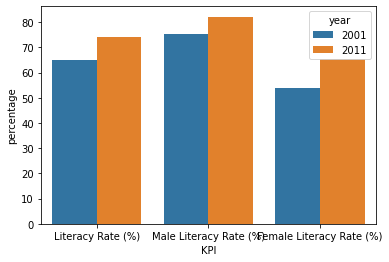

In [26]:
# make a bar plot from this data
# x-axis is the KPI
# y-axis is the percentage
# hue is the grouping factor
sns.barplot(x="KPI", y="percentage", hue="year", data=df_melted)